In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

,0
0,0.25
1,0.50
2,0.75
3,1.00


In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b','c','d'])
data

,0
a,0.25
b,0.50
c,0.75
d,1.00


In [8]:
data['b']

0.5

In [9]:
city_zip_dict = {
    'New York': '10001',
    'Los Angeles': '90001',
    'Chicago': '60601',
    'Houston': '77001',
    'Phoenix': '85001'
}

cities = pd.Series(city_zip_dict)


In [10]:
cities.index

Index(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], dtype='object')

In [11]:
citiesDf = pd.DataFrame(cities)

In [12]:
citiesDf.head()

,0
New York,10001
Los Angeles,90001
Chicago,60601
Houston,77001
Phoenix,85001


In [13]:
populationDict = {
    'New York': '8260000',
    'Los Angeles': '3820000',
    'Chicago': '2660000',
    'Houston': '2310000',
    'Phoenix': '1650000'
}
populationDict

{'New York': '8260000',
 'Los Angeles': '3820000',
 'Chicago': '2660000',
 'Houston': '2310000',
 'Phoenix': '1650000'}

In [14]:
populationSeries = pd.Series(populationDict)
populationSeries

,0
New York,8260000
Los Angeles,3820000
Chicago,2660000
Houston,2310000
Phoenix,1650000


In [29]:
citiesDf = pd.DataFrame({'population': populationSeries,
                         'zip': cities})
citiesDf

,population,zip
New York,8260000,10001
Los Angeles,3820000,90001
Chicago,2660000,60601
Houston,2310000,77001
Phoenix,1650000,85001


In [16]:
citiesDf.index

Index(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], dtype='object')

In [17]:
citiesDf.columns

Index(['population', 'zip'], dtype='object')

In [18]:
citiesDf['population']

,population
New York,8260000
Los Angeles,3820000
Chicago,2660000
Houston,2310000
Phoenix,1650000


In [19]:
citiesDf.population

,population
New York,8260000
Los Angeles,3820000
Chicago,2660000
Houston,2310000
Phoenix,1650000


In [20]:
citiesDf.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, New York to Phoenix
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   population  5 non-null      object
 1   zip         5 non-null      object
dtypes: object(2)
memory usage: 292.0+ bytes


# Operating on Data

In [21]:
import pandas as pd
import numpy as np

In [22]:
rng = np.random.default_rng(42)
ser = pd.Series(rng.integers(0,10,4))
ser

,0
0,0
1,7
2,6
3,4


In [23]:
df = pd.DataFrame(rng.integers(0,10,(3,4)),
             columns=['A','B','C','D'])
df

,A,B,C,D
0,4,8,0,6
1,2,0,5,9
2,7,7,7,7


# Comibining DataSets: Concat and appendkk

In [1]:
import pandas as pd
import numpy as np

In [2]:
def make_df(cols, index):
    data = {c: [str(c) + str(i) for i in index] for c in cols}
    return pd.DataFrame(data, index)

In [3]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [13]:
# class to allow us to display multiple DF side by side
class display(object):
  template = """<div style="float: left;
                     padding: 10px;">
                  <p style = 'font-family: "Courier New", Courier, monospace>{0}{1}"""

  def __init__(self, *args):
    self.args = args

  def _repr_html_(self):
    return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                      for a in self.args)

  def __repr__(self):
    return '\n\n'.join(a + '\n' + repr(eval(a))
                        for a in self.args)

In [14]:
# Concatenation
s1 = pd.Series(['A', 'B','C'], index = [1,2,3])
s2 = pd.Series(['D','E','F'], index = [4,5,6])

pd.concat([s1,s2])

,0
1,A
2,B
3,C
4,D
5,E
6,F


In [22]:
# for df
df1  = make_df('AB', [1,2])
df2 = make_df('AB', [3,4])



In [23]:
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [30]:
#column wise
df3  = make_df('AB', [1,2])
df4 = make_df('CD', [1,2])
pd.concat([df3, df4], axis =1)

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2


# JOins

1. One to One Joins
2. Many to one joins
3. Many to Many Joins

***One to ONe JOins***

In [49]:
df1 = pd.DataFrame({'employee': ['Alex', 'Roy', 'Shital','Allu', 'Pritam'],
                    'group': ['Accounting', 'Engineering', 'HR', 'Sales','Engineering']})
df2 = pd.DataFrame({'employee':['Roy','Shital','Allu','Alex', 'Pritam'],
                    'joinDate':[2005,2018,2024,2022, 2000]})

df1, df2

(  employee        group
 0     Alex   Accounting
 1      Roy  Engineering
 2   Shital           HR
 3     Allu        Sales
 4   Pritam  Engineering,
   employee  joinDate
 0      Roy      2005
 1   Shital      2018
 2     Allu      2024
 3     Alex      2022
 4   Pritam      2000)

In [50]:
df1_df2 = pd.merge(df1, df2)
df1_df2

,employee,group,joinDate
0,Alex,Accounting,2022
1,Roy,Engineering,2005
2,Shital,HR,2018
3,Allu,Sales,2024
4,Pritam,Engineering,2000


**Many to One Joins**

In [51]:
df3 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR', 'Sales'],
                    'supervisor':['Rahul', 'Aman','Pinki', 'PK']})

pd.merge(df1_df2, df3)

,employee,group,joinDate,supervisor
0,Alex,Accounting,2022,Rahul
1,Roy,Engineering,2005,Aman
2,Shital,HR,2018,Pinki
3,Allu,Sales,2024,PK
4,Pritam,Engineering,2000,Aman


In [53]:
import os

repo = "https://raw.githubusercontent.com/jakevdp/data-USstates/master"

# Create a directory called 'data' if it doesn't exist
if not os.path.exists('data'):
  os.makedirs('data')

# Download the files using curl
#the exclamation mark is to tell the system to execute a terminal command
!cd data && curl -O {repo}/state-population.csv
!cd data && curl -O {repo}/state-areas.csv
!cd data && curl -O {repo}/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   212k      0 --:--:-- --:--:-- --:--:--  211k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   3475      0 --:--:-- --:--:-- --:--:--  3479
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   4574      0 --:--:-- --:--:-- --:--:--  4589


In [54]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

In [55]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [56]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [58]:
abbrevs.tail()

,state,abbreviation
46,Virginia,VA
47,Washington,WA
48,West Virginia,WV
49,Wisconsin,WI
50,Wyoming,WY


# rank US states and territories by their 2010 population density

In [60]:
#merge dataset on state/region
mergedDf = pd.merge(pop, abbrevs, how='outer',
                    left_on='state/region', right_on='abbreviation')
mergedDf.head()

,state/region,ages,year,population,state,abbreviation
0,AK,total,1990,553290.0,Alaska,AK
1,AK,under18,1990,177502.0,Alaska,AK
2,AK,total,1992,588736.0,Alaska,AK
3,AK,under18,1991,182180.0,Alaska,AK
4,AK,under18,1992,184878.0,Alaska,AK


In [68]:
mergedDf.isnull().sum()

,0
state/region,0
ages,0
year,0
population,20
state,96
abbreviation,96


In [70]:
mergedDf[mergedDf['population'].isnull()]

,state/region,ages,year,population,state,abbreviation
1872,PR,under18,1990,NaN,NaN,NaN
1873,PR,total,1990,NaN,NaN,NaN
1874,PR,total,1991,NaN,NaN,NaN
1875,PR,under18,1991,NaN,NaN,NaN
1876,PR,total,1993,NaN,NaN,NaN
1877,PR,under18,1993,NaN,NaN,NaN
1878,PR,under18,1992,NaN,NaN,NaN
1879,PR,total,1992,NaN,NaN,NaN
1880,PR,under18,1994,NaN,NaN,NaN
1881,PR,total,1994,NaN,NaN,NaN


## Observation
**The data for Puerto Rico (PR) is missing before 2000.**

In [77]:
mergedDf.loc[mergedDf['state'].isnull(),'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [78]:
mergedDf.loc[mergedDf['abbreviation'].isnull(),'state/region'].unique()

array(['PR', 'USA'], dtype=object)

## Observation
**Data for PR and USA is missing in state abbreviation key.**

#### Solution
fix this by fill appropriate entries for PR and USA

In [87]:
mergedDf.loc[mergedDf['state/region'] == 'PR','state'] = 'Puerto Rico'
mergedDf.loc[mergedDf['state/region'] == 'USA','state'] = 'United State'


In [89]:
mergedDf.isnull().sum()

,0
state/region,0
ages,0
year,0
population,20
state,0
abbreviation,96


***Merge data with area data  -- join using **state** ***

In [134]:
finalDf = pd.merge(mergedDf, areas, on='state', how='left')
finalDf.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,AK,656425.0
1,AK,under18,1990,177502.0,Alaska,AK,656425.0
2,AK,total,1992,588736.0,Alaska,AK,656425.0
3,AK,under18,1991,182180.0,Alaska,AK,656425.0
4,AK,under18,1992,184878.0,Alaska,AK,656425.0


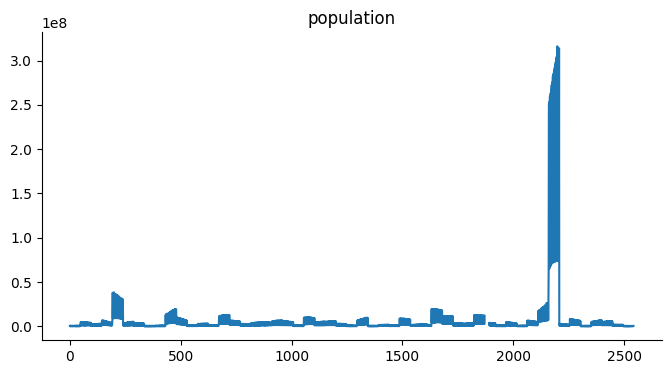

In [135]:
# @title population

from matplotlib import pyplot as plt
finalDf['population'].plot(kind='line', figsize=(8, 4), title='population')
plt.gca().spines[['top', 'right']].set_visible(False)

In [98]:
finalDf.isnull().sum()

,0
state/region,0
ages,0
year,0
population,20
state,0
abbreviation,96
area (sq. mi),48


We now have null values in area(sq.mi) column

In [113]:
finalDf['state'][finalDf['area (sq. mi)'].isnull()].unique()

array(['United State'], dtype=object)

## Observation
Areas dataframe doesnot contain the area of united states.



> we will drop this becuase it is not related to our analysis



In [116]:
finalDf.dropna(inplace=True)
finalDf.isnull().sum()

,0
state/region,0
ages,0
year,0
population,0
state,0
abbreviation,0
area (sq. mi),0


In [117]:
finalDf.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,AK,656425.0
1,AK,under18,1990,177502.0,Alaska,AK,656425.0
2,AK,total,1992,588736.0,Alaska,AK,656425.0
3,AK,under18,1991,182180.0,Alaska,AK,656425.0
4,AK,under18,1992,184878.0,Alaska,AK,656425.0


In [119]:
finalDf['year'].unique()

array([1990, 1992, 1991, 1994, 1993, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2013, 2009, 2010,
       2011, 2012])

In [129]:
#get the data from 2010-2012
data2012 = finalDf.query("year==2012 & ages=='total'")
data2012.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
47,AK,total,2012,730307.0,Alaska,AK,656425.0
49,AL,total,2012,4817528.0,Alabama,AL,52423.0
143,AR,total,2012,2949828.0,Arkansas,AR,53182.0
145,AZ,total,2012,6551149.0,Arizona,AZ,114006.0
193,CA,total,2012,37999878.0,California,CA,163707.0


In [130]:
data2012.set_index('state', inplace=True)

In [132]:
density = data2012['population'] / data2012['area (sq. mi)']
density.head()

,0
state,
Alaska,1.112552
Alabama,91.897221
Arkansas,55.466662
Arizona,57.463195
California,232.121278


In [133]:
density.sort_values(ascending=False, inplace=True)
density.head()

,0
state,
District of Columbia,9315.102941
New Jersey,1016.710502
Rhode Island,679.808414
Connecticut,647.865260
Massachusetts,629.588157
